# Tutorial Riepybdlib

```riepybdlib``` is a Python module for probabilistic imitation learning on Riemannian manifolds. it implements all techniques that are presented in the paper "An Approach for Imitation Learning on Riemannian Manifolds" 
<cite data-cite="Zeestraten2017">(Zeestraten et al., 2017)</cite>.

Here, we give a tutorial on the functionality of the library. 

riepybdlib comes with a set of submodules, in this tutorial we will need the following

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Tutorial-Riepybdlib" data-toc-modified-id="Tutorial-Riepybdlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tutorial Riepybdlib</a></div><div class="lev1 toc-item"><a href="#Riemannian-Manifolds" data-toc-modified-id="Riemannian-Manifolds-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Riemannian Manifolds</a></div><div class="lev2 toc-item"><a href="#Cartesian-Product" data-toc-modified-id="Cartesian-Product-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cartesian Product</a></div><div class="lev1 toc-item"><a href="#Riemannian-Gausssian" data-toc-modified-id="Riemannian-Gausssian-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Riemannian Gausssian</a></div><div class="lev2 toc-item"><a href="#Maximum-Likelihood-Estimate-from-Data" data-toc-modified-id="Maximum-Likelihood-Estimate-from-Data-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Maximum Likelihood Estimate from Data</a></div><div class="lev2 toc-item"><a href="#Gaussian-Conditioning" data-toc-modified-id="Gaussian-Conditioning-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gaussian Conditioning</a></div><div class="lev2 toc-item"><a href="#Gaussian-Product" data-toc-modified-id="Gaussian-Product-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gaussian Product</a></div><div class="lev1 toc-item"><a href="#Gaussian-Mixture-Models" data-toc-modified-id="Gaussian-Mixture-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gaussian Mixture Models</a></div><div class="lev2 toc-item"><a href="#Gaussian-Mixture-Regression" data-toc-modified-id="Gaussian-Mixture-Regression-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gaussian Mixture Regression</a></div><div class="lev2 toc-item"><a href="#Task-Parameterized-Gaussian-Mixture-Model" data-toc-modified-id="Task-Parameterized-Gaussian-Mixture-Model-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Task-Parameterized Gaussian Mixture Model</a></div><div class="lev1 toc-item"><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></div>

$\newcommand{\Ac}[3]{\mathcal{A}_{\boldsymbol{#2}}^{\boldsymbol{#3}}
                \left( \boldsymbol{#1}_\boldsymbol{#2} \right)}$  
$\newcommand{\Aci}[3]{{\mathcal{A}^{-1}}_{\boldsymbol{#2}}^{\boldsymbol{#3}}
                \left( \boldsymbol{#1}_\boldsymbol{#2} \right)}$  
$\newcommand{\mf}[1]{\mathfrak{#1}}$  
$\newcommand{\mb}[1]{\boldsymbol{#1}}$ 
$\newcommand{\Log}[2]{\operatorname{Log}_{\boldsymbol{#2}}\left(\boldsymbol{#1}\right)}$ 
$\newcommand{\Exp}[2]{\operatorname{Exp}_{\boldsymbol{#2}}\left(
        \mathfrak{#1}_{\boldsymbol{#2}}\right)}$ 
$\newcommand{\TS}[1]{\mathcal{T}_{\boldsymbol{#1}}\mathcal{M} }$ 
$\newcommand{\gauss}[1]{\mathcal{N}\left(#1\right)}$ 
$\newcommand{\ssgauss}[1]{\mathcal{N}_{\mathcal{S}^2}\left(#1\right)}$ 
$\newcommand{\mgauss}[2]{\mathcal{N}_{#1}\left(#2\right)}$ 
$\newcommand{\Stwo}{\mathcal{S}^2}$ 
$\newcommand{\GA}[3]{ {}^\mathcal{N\small}\!\!\! \mathcal{A}_{#2}^{#3} \left( \mathcal{N}_\mb{#2} #1 \right) }$ 
$\newcommand{\trsp}{{\!\scriptscriptstyle\top}}$
$\newcommand{\TA}[2]{ \mathcal{A}_{\mathcal{T}_{\boldsymbol{#1}}\mathcal{M}} \left( \boldsymbol{#2}_{\boldsymbol{#1}} \right) }$ 
$\newcommand{\tin}{ {\! \scriptscriptstyle \mathcal{I}}} $
$\newcommand{\tout}{ {\! \scriptscriptstyle \mathcal{O}}} $
$\newcommand{\sLog}[2]{\operatorname{Log}_{#2} \!\!\left(#1 \right)}$
$\newcommand{\sExp}[2]{\operatorname{Exp}_{#2} \!\!\left( #1\right)}$
$\newcommand{\Apar}[3]{ \boldsymbol{\mathcal{A}_{\parallel}
					\!}_{\boldsymbol{#2}}^{\boldsymbol{#3}} \!\!\left( #1\right) }$



In [1]:
import numpy as np # (riepybdlib requires numpy arrays)
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
import riepybdlib.manifold as rm   # For the manifold functionality
import riepybdlib.statistics as rs # For statistics on riemannian manifolds
import riepybdlib.data as pbddata  # Some data to showcase the toolbox
import riepybdlib.plot as pbdplt   # Plot functionality (relies on matplotlib)
import riepybdlib.s2_fcts as s2_fcts

cols = cm.Set1(np.linspace(0,1,10))[:,0:3] # Standard plot colors

# Riemannian Manifolds
Unlike most methods in imitation learning---that implicitly assume that the demonstration data lives in a Euclidean space---riepybdlib allows to specificaty the demonstration data manifold. This is convenient because it allows to include non-Euclidean demonstration data such as rotation data expressed in Quaternions. 

The current version of riepybdlib has the following manifolds predefined:
* d-dimensional Euclidean spaces
* 2-Sphere
* Quaternion manifold (3-sphere tailored for Quaternion objects)

These manifolds are created as follows

In [2]:
m_3deucl = rm.get_euclidean_manifold(3,'3d-eucl')
m_time = rm.get_euclidean_manifold(1,'time')
m_quat = rm.get_quaternion_manifold('orientation')
m_s2   = rm.get_s2_manifold('2-sphere')

## Cartesian Product
Demonstration data often exist on a combination of manifolds. ```riepypbdlib``` allows you to create any combination of manifolds through the Cartesian product. Let's assume that we have demonstration that consists of a temporal signal, 3d-position, and orientation. Such manifold is created by simple multiplication

In [3]:
m_dem = m_time*m_3deucl*m_quat
m_times2 = m_time*m_s2
print(m_dem.name)
print(m_times2.name)

time x 3d-eucl x orientation
time x 2-sphere


# Riemannian Gausssian 

```riepyblib``` uses a Gaussian-like distribution which is defined as follows:
\begin{align}
	\mgauss{\mb{x}; \mb{\mu}, \mb{\Sigma} } = 
		\frac{1}{\sqrt{(2\pi)^{d}|\mb{\Sigma}|}}
		e^{
		-\frac{1}{2}
		\Log{x}{\mu}^\trsp \mb{\Sigma}^{-1} \Log{x}{\mu}
		}, \label{eq:riemangauss}
\end{align}
where $\mb{\mu} \in \mathcal{M}$ is the Riemannian center of mass, 
and $\mb{\Sigma}$ the covariance defined in the tangent space $\TS{\mu}$.
This is a simplification of the the maximum entropy distribution given the first two moments---mean point and covariance. We use this simplification because the exact solution is computationally impractical.

As an example we define a Gaussian on the $\mathbb{R} \times \Stwo$ manifold. With the identity element as mean, and a identity matrix with the dimension of the manifolds' tangent space as covariance:

In [4]:
mu = m_times2.id_elem             
sigma = np.eye(m_times2.n_dimT)   
gauss = rs.Gaussian(m_times2, mu,sigma)

## Maximum Likelihood Estimate from Data

The parameters of the Gaussian can be estimated by maximizing its log-likelihood with respect to a data set. We demonstrate how to perform this by in ```riepybdlib``` using an example. 

First, we load the 'I' dataset which is defined on the 2-sphere.

In [5]:
m_data = np.vstack(pbddata.get_letter_dataS2(letter='I',n_samples=4,use_time=False))

Then we create a Gaussian on the 2-sphere manifold and estimate its mean and covariance using the maximum likelihood estimate function ```mle```.  

In [6]:
g = rs.Gaussian(m_s2).mle(m_data)

To visualize the result, we can use the plot module of ```riepybdlib```. It allows to plot Gaussians with a 2D, or 3D tangent space. In this tutorial we mainly use the manifold $\Stwo$ because it is curved, and allows visualization.

The function plot_gaussian_s2(...), will be removed in future releases.


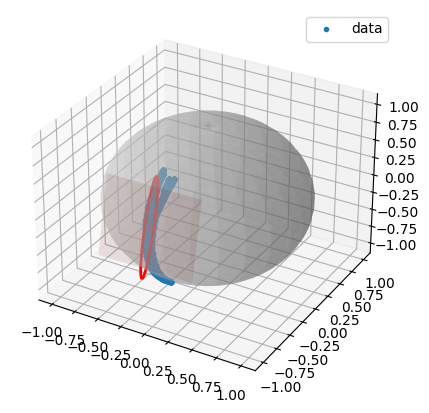

In [7]:
plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')

s2_fcts.plot_manifold(ax) # Manifold
plt.plot(m_data[:,0],m_data[:,1],m_data[:,2],'.', label='data') # Original Data
pbdplt.plot_gaussian_s2(ax,g.mu,g.sigma,label='Gaussian')            # Gaussian
plt.legend();

The red colored oval visualizes the covariance matrix that is defined in the tangent space of the mean value. The boundary indicates 1 standard deviation of the distribution.

## Gaussian Conditioning 

When the Gaussian encodes a joint probability density function (pdf) over multiple manifolds, we can compute a conditional probability. This feature can for example be used to drive responsive behavior of a robot. 

Lets extend the previous example where we encoded the letter 'I' in a pdf, to the case where we encode the joint density of time and 'position'  on the 2-sphere. Again, we load the data set, but this time with the temporal signal. Since the letter data is originally defined in the Euclidean space, we project it onto the manifold using the exponential function. 


In [8]:
# Load 4 demonstrations:
dems = pbddata.get_letter_dataS2(letter='I',n_samples=4,use_time=True)

# Combine seperate demonstrations in one list:
m_data= [point for dem in dems for point in dem]

# Train Gaussian:
g = rs.Gaussian(m_times2).mle(m_data)

Now we have the model encoding the joint pdf $\mathcal{P}(t,x)$ with $t\in \mathbb{R}$ and $x\in \mathcal{S}^2$. 
To compute the conditional probability $\mathcal{P}(x|t)$, we use the ```condition()``` function. Where we specify the datapoint on the input manifold, the index of the input manifold and the index of the output manifold.

In [9]:
results = []
i_in  = 0 # Input manifold index
i_out = 1 # Output manifold index
x_in = m_data[0:200:10]
results = g.condition(x_in,i_in=i_in,i_out=i_out)

The result is then displayed on the output manifold $\mathcal{S}^2$.

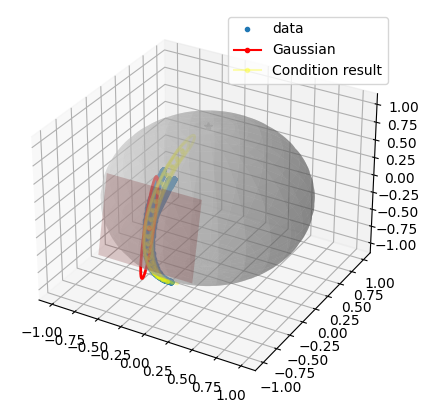

In [10]:
plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')

# s2_fcts.plot_manifold(ax) # Manifold
plt_data = m_times2.swapto_tupleoflist(m_data)
plt.plot(plt_data[1][:,0],plt_data[1][:,1],plt_data[1][:,2],'.', label='data')     # Original Data
s2_fcts.plot_gaussian(ax,g.margin(1).mu,g.margin(1).sigma,label='Gaussian')  # Gaussian
label = 'Condition result'
for r in results:
    s2_fcts.plot_gaussian(ax,r.mu,r.sigma,showtangent=False,
                         linealpha=0.3,color='yellow',label=label)
    label=''

plt.legend();

## Gaussian Product

The product of Gaussian combines two Gaussian distributions into one. This operation can be used in various applications such as sensor fusion, Kalman filtering, and also imitation learning as will be shown later on.

Here we demonstrate the use of the Gaussian product. We first define two Gaussian on the manifold $\mathcal{S}^2$.

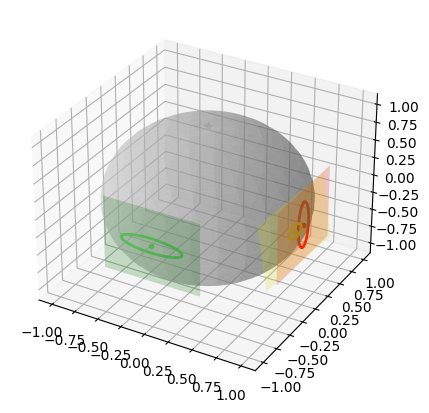

In [11]:
g1 = rs.Gaussian(m_s2, np.array([1,0,0]),np.diag([0.1,0.01]))
g2 = rs.Gaussian(m_s2, np.array([0,-1,0]),np.diag([0.1,0.01]))

g1g2= g1*g2

plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')

s2_fcts.plot_manifold(ax) # Manifold
s2_fcts.plot_gaussian(ax,g1.mu,g1.sigma,color=[1,0,0])
s2_fcts.plot_gaussian(ax,g2.mu,g2.sigma,color=[0,1,0])
s2_fcts.plot_gaussian(ax,g1g2.mu,g1g2.sigma,color=[1,1,0])

# Gaussian Mixture Models
A Gaussian Mixture Model (GMM) on a Riemannian manifold is defined similarly to a GMM in Euclidean space: by a weighted sum of Gaussians

\begin{align}
	\mathcal{P}{(\mb{x})} = \sum_{i=1}^K \pi_i \gauss{\mb{x}; \mb{\mu}_i, \mb{\Sigma}_i},
\end{align}

where $\pi_i$ are the priors ($\sum_i^K \pi_i =1$). In imitation learning, they are used to represent nonlinear behavior in a probabilistic manner. 
%
Parameters of the GMM can be estimated by Expectation Maximization (EM), an iterative process in which the data are given weights for each cluster (Expectation step), and in which the clusters are subsequently updated using a weighted MLE (Maximization step). We refer to <cite data-cite="SimoSerra2016">(Simmo-Serra, 2016)</cite> for a detailed description of EM for Riemannian GMMs.

Here we demonstrate how to create and train a GMM in ```riepybdlib```. Like the Gaussian, one needs to explicitly define the manifold on which the GMM is defined. In addition, one needs to specify the number of components. In this example we use the manifold $\mathbb{R} \times \mathcal{S}^2$. 

In [12]:
# Create GMM, 
gmm = rs.GMM(m_times2,6)

To train the GMM, we first initialize its parameters using the k-means algorithm (which is adjusted to function on Riemannian data). Then, we fit the data using which involves the EM-algorithm:

In [13]:
# Get some data to train the GMM:
dems = pbddata.get_letter_dataS2(letter='S',n_samples=4,use_time=True)
m_data= [point for dem in dems for point in dem]

gmm.kmeans(m_data)             # Initialization
lik,avglik = gmm.fit(m_data, reg_lambda=1e-2)   # Expectation Maximiation

K-means converged in 7 iterations
EM converged in 39 steps


To give an indication of the convergence behavior we display the evolution of the log-lielihood.

Text(0, 0.5, '$-\\frac{1}{N}\\sum_i^N \\ln(\\mathcal{P}(x_i))$')

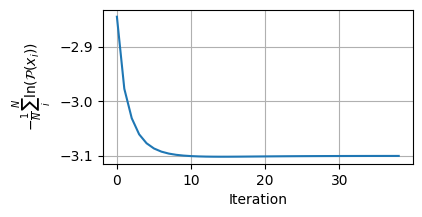

In [14]:
plt.figure(figsize=(4,2))
plt.plot(avglik)
plt.grid('on')
plt.xlabel('Iteration')
plt.ylabel(r'$-\frac{1}{N}\sum_i^N \ln(\mathcal{P}(x_i))$')

And finally, the resulting fit (displayed on the manifold $\mathcal{S}^2$)

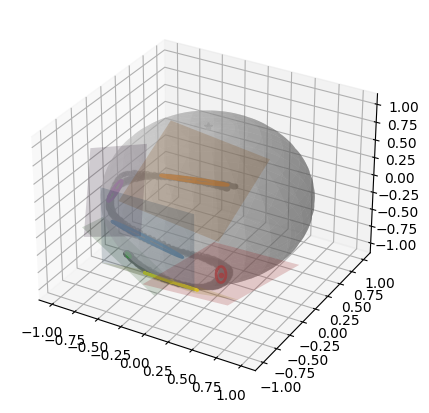

In [15]:
# Plot results
plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')
s2_fcts.plot_manifold(ax) # Manifold

# Data:
plt_data = m_times2.swapto_tupleoflist(m_data)
plt.plot(plt_data[1][:,0],plt_data[1][:,1],plt_data[1][:,2],
         '.', label='data',color='gray',alpha=0.5)  

# GMM:
for i,g in enumerate(gmm.gaussians):
    gtmp = g.margin(1) # Compute margin to display only s2
    s2_fcts.plot_gaussian(ax,gtmp.mu,gtmp.sigma,color=cols[i,:])

## Gaussian Mixture Regression

A popular regression technique for Euclidean GMM is GMR 
<cite data-cite="Calinon16JIST">(Calinon, 2016)</cite>.
It approximates the conditioned GMM using a single Gaussian, i.e.


\begin{align}
    \gauss{\hat{\mb{\mu}}_\tout, \hat{\mb{\Sigma}}_{\tout} } 
    \approx \mathcal{P}({\mb{x}_\tout|\mb{x}_\tin}).
\end{align}

Similarly, to Gaussian conditioning this operation requires the specification of an input and output manifold. 

In [16]:
i_in  = 0 # Input manifold index
i_out = 1 # Output manifold index
results = []
for p in list(m_data[0:200:1]):
    results.append(gmm.gmr(p[i_in],i_in=i_in,i_out=i_out)[0])

Conditioning within manifolds is not possible. Thus, if you have specified a manifold $\mathbb{R}^3$, it is not possible to condition along one of the specific dimensions. To achieve this, you should specify this manifold as a Cartesian product of $\mathbb{R} \times \mathbb{R}^2$.  

The results can then be plotted in the output manifold.

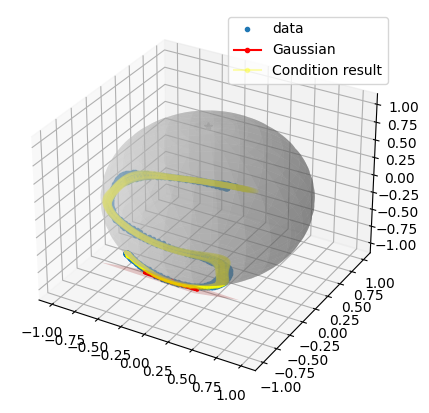

In [17]:
plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')

s2_fcts.plot_manifold(ax) # Manifold
plt_data = m_times2.swapto_tupleoflist(m_data)
plt.plot(plt_data[1][:,0],plt_data[1][:,1],plt_data[1][:,2],'.', label='data')     # Original Data
s2_fcts.plot_gaussian(ax,g.margin(1).mu,g.margin(1).sigma,label='Gaussian')  # Gaussian
label = 'Condition result'
for r in results:
    s2_fcts.plot_gaussian(ax,r.mu,r.sigma,showtangent=False,
                         linealpha=0.3,color='yellow',label=label)
    label=''

plt.legend()

## Task-Parameterized Gaussian Mixture Model

One of the challenges in imitation learning is to generalize skills to previously unseen situations, while keeping a small set of demonstrations. 
In task-parameterized representations, this challenge is tackled by considering the robot end-effector motion from different perspectives (frames of reference such as object, robot base or landmarks, <cite data-cite="Calinon16JIST">Calinon, 2016)</cite>. These perspectives are defined in a global frame of reference through the \emph{task parameters} $\mb{A}$ and $\mb{b}$, representing a linear transformation and translation, respectively. In Euclidean spaces this allows data to be projected to the global frame of reference through the linear operation $\mb{A}\mb{u} + \mb{b}$. 

A similar approach can be taken for Riemannian manifolds. 
We load four demonstrations of a point-to-point movement on $\Stwo$, which are observed from two different frames of reference (start and end points). 

In [18]:
(data, TPs, data_info) = pbddata.get_tp_dataS2(use_time=True)

# Construct data structure for training:
f_data = []
f_data.append( m_times2.swapto_tupleoflist([p for dem in data[0] for p in dem  ]) )
f_data.append( m_times2.swapto_tupleoflist([p for dem in data[1] for p in dem  ]) )
tpdata = (f_data[0][0], f_data[0][1], f_data[1][1])

In [19]:
def shape(ndarray):
    if isinstance(ndarray, (list, tuple)):
        # More dimensions, so make a recursive call
        outermost_size = len(ndarray)
        row_shape = shape(ndarray[0])
        return (outermost_size, *row_shape)
    else:
        # No more dimensions, so we're done
        return ()

In [20]:
len(tpdata), len(tpdata[0]), len(tpdata[0][0])
len(f_data), len(f_data[0]), len(f_data[0][0])
# print(f_data[0][0].shape)
# print(data[1])
# print(data_info)
# print([i[0] for i in data[0]])
# data: 2 x 4 x 200, n_frames x n_dims (time + rot_s2) x n_obs
# tpdata: tuple(
#     800 x 1: n_obs x 1, time
#     800 x 3: n_obs x 3, rot_s2 in frame 1
#     800 x 3: n_obs x 3, rot_s2 in frame 2
# )
print(tpdata[0].shape)
print(tpdata[1].shape)
print(tpdata[2].shape)

(800, 1)
(800, 3)
(800, 3)


The constructed data set consists of elements on the manifold $\mathbb{R} \times \mathcal{S}^2 \times \mathcal{S}^2$. We encode this data set in a Gaussian mixture model of $3$ components. 

In [21]:
# Fit GMM:
mytpgmm = rs.GMM(m_time*m_s2*m_s2, n_components=3)
mytpgmm.init_time_based(tpdata[0], tpdata)

mytpgmm.fit(tpdata);

(800, 7)
EM converged in 13 steps


We then obtain the mixture of Gaussian defined in the seperate frames through marginalization.

In [20]:
# The GMM in each frame can be computed by marginalizing:
gmms = []
gmms.append(mytpgmm.margin([0,1])) # Frame 1
gmms.append(mytpgmm.margin([0,2])) # Frame 2

In [81]:
print([shape(g.mu) for g in mytpgmm.gaussians])
print(mytpgmm.manifold.name)

[(3,), (3,), (3,)]
time x 2-sphere x 2-sphere


We then visualize the results by plotting the GMMs fitted in each frame. Note that the 'top' of the sphere indicates the origin of the frame. 

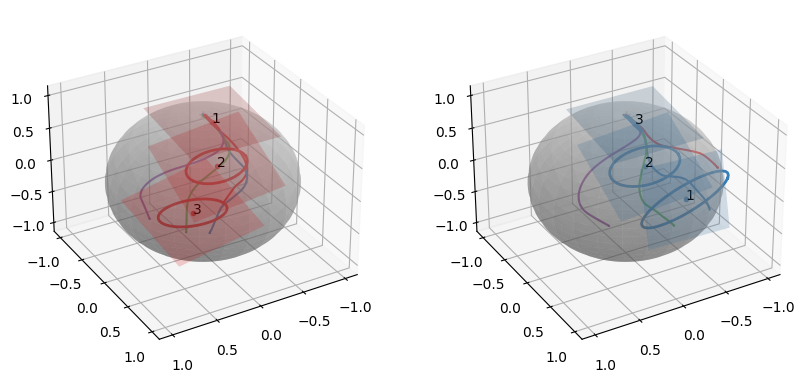

In [21]:
# Plot demonstrations

plt.figure(figsize=(10,5) )

for i, gmm in enumerate(gmms):
    ax  = plt.subplot(1,2,i+1,projection='3d')
    s2_fcts.plot_manifold(ax)
    
    # Plot data:
    for j,dem in enumerate(data[i]):
        s2data = m_times2.swapto_tupleoflist(dem)[1]
        plt.plot(s2data[:,0],s2data[:,1],s2data[:,2],color=cols[j,])
    
    # Plot Gaussians
    for j,g in enumerate(gmm.gaussians):
        g = g.margin(1)
        s2_fcts.plot_gaussian(ax,g.mu,g.sigma,color=cols[i,:])
        ax.text(g.mu[0],g.mu[1],g.mu[2],'{0}'.format(j+1))
    ax.view_init(30,60)
    

The linear action $\mb{A}x+\mb{b}$, performed in the Euclidean space, can be translated to the Riemannian manifold. Here, the transformation $\mb{A}$ represents a rotation of the tangent spaces, and the translation $\mb{b}$ the new position of the origin. $\mb{A}$ is thus represented by a 2-Tensor (matrix) defined in the tangent space, and $\mb{b}$ is an element of the manifold.

We first define some arbitrary for $\mb{A}$ and $\mb{b}$ for each frame, apply them and then visualize their result.

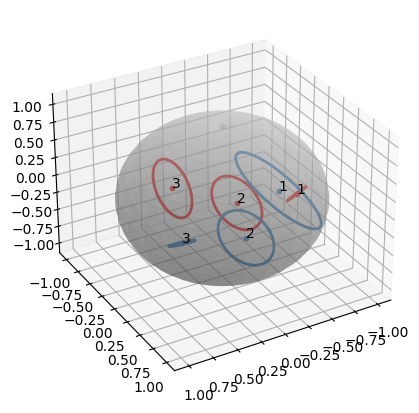

In [22]:
# Define transformations on S2
th1 = 2*np.pi/6
ph1 = 4*np.pi/6
th2 = 3*np.pi/6
ph2 = 1*np.pi/6
bs = [(0, s2_fcts.sphere(1,th1,ph1) ), # New position of frame 1
      (0, s2_fcts.sphere(1,th2,ph2) )] # New position of frame 2
A1 = np.eye(3)
A1[1:,1:]  = s2_fcts.fR(-1*np.pi/3)
A2 = np.eye(3)
A2[1:,1:]  = s2_fcts.fR(2*np.pi/6)
As =[A1, A2]

# Apply Transformations:
gmms_lt = []
for i, g in enumerate(gmms):
    A = As[i] 
    b = bs[i]
    gtmp = g.copy()
    
    # Apply changes to the copy
    gtmp.tangent_action(A)     # Rotate Gaussian in the tangent space of the orign
    gtmp.parallel_transport(b) # Move origin
    gmms_lt.append( gtmp )

plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')
s2_fcts.plot_manifold(ax)
for i, gmm in enumerate(gmms_lt):
    # Plot Gaussians
    for j,g in enumerate(gmm.gaussians):
        g = g.margin(1)
        s2_fcts.plot_gaussian(ax,g.mu,g.sigma,color=cols[i,:],showtangent=False)
        ax.text(g.mu[0],g.mu[1],g.mu[2],'{0}'.format(j+1))
    ax.view_init(30,60)

Using the task-parameters, we have projected the individual Gaussian in the 'global' frame. Now we can combine the local frame information to generate a combined mixture model.

First, we perform Gaussian Mixture Regression in each individual frame to compute $\mathcal{P}(x|t)$ at each time step. 

In [23]:
tin = tpdata[0][0:200]
g1 = gmms_lt[0].gmr(tin,i_in=0,i_out=1)
g2 = gmms_lt[1].gmr(tin,i_in=0,i_out=1)

Then, we combine the results in the different frames using the product of Gaussian. 

In [24]:
g1g2 = []
for i in range(len(g1)):
    g1g2.append(g1[i]*g2[i])

Finally, we plot the results.

The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future releases.
The function plot_gaussian_s2(...), will be removed in future re

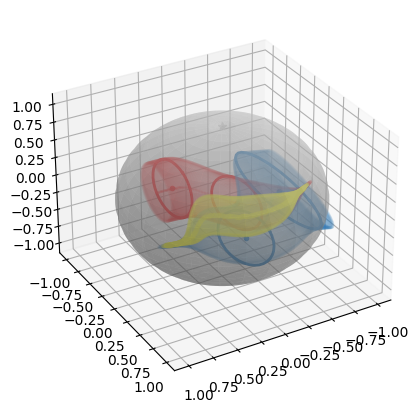

In [25]:
plt.figure(figsize=(5,5) )
ax = plt.subplot(111,projection='3d')
s2_fcts.plot_manifold(ax)
for i, gmm in enumerate(gmms_lt):
    # Plot Gaussians
    for j,g in enumerate(gmm.gaussians):
        g = g.margin(1)
        s2_fcts.plot_gaussian(ax,g.mu,g.sigma,color=cols[i,:],showtangent=False)

# Plot the tubes of Gaussian Resulting from GMR on g1 and g2:
for i, gmm in enumerate([g1,g2]):
    for g in gmm:
        pbdplt.plot_gaussian_s2(ax,g.mu,g.sigma,color=cols[i,:],
                               showtangent=False,linealpha=0.1)
# Plot the result of the product of Gaussian:
for j,g in enumerate(g1g2):
    s2_fcts.plot_gaussian(ax,g.mu,g.sigma,color=cols[5,:],showtangent=False,
                         linealpha=0.2)
ax.view_init(30,60)


# References

(<a id="cit-Zeestraten2017" href="#call-Zeestraten2017">Zeestraten, Havoutis <em>et al.</em>, 2017</a>) Zeestraten M.J.A., Havoutis I., Silverio J. <em>et al.</em>, ``_An Approach for Imitation Learning on Riemannian Manifolds_'', IEEE Robotics and Automation Letters (RA-L), vol. , number , pp. , January 2017.

(<a id="cit-SimoSerra2016" href="#call-SimoSerra2016">Simo-Serra, Torras <em>et al.</em>, 2016</a>) Simo-Serra E., Torras C. and Moreno-Noguer F., ``_3D Human Pose Tracking Priors using Geodesic Mixture Models_'', International Journal of Computer Vision (IJCV), vol. , number , pp. 1--21, August 2016.

(<a id="cit-Calinon16JIST" href="#call-Calinon16JIST">Calinon, 2016</a>) Calinon S., ``_A Tutorial on Task-Parameterized Movement Learning and Retrieval_'', Intelligent Service Robotics, vol. 9, number 1, pp. 1--29, January 2016.

